# Codveda Level 2 - Task 3 (Clustering (Unsupervised Learning))

## Customer Segmentation Case

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Load data

In [ ]:
data = pd.read_csv('churn-bigml-20.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


### Preprocessing

In [ ]:
data_clean = data.drop(columns=['Churn','State'])
data_clean.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [ ]:
# Encode Categorical variables
data_clean['International plan'] = LabelEncoder().fit_transform(data_clean['International plan'])
data_clean['Voice mail plan'] = LabelEncoder().fit_transform(data_clean['Voice mail plan'])
data_clean.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [ ]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_clean)

In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns=data_clean.columns)
scaled_data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.347127,-0.674397,-0.293801,-0.628806,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,-0.423098
1,-0.927731,-0.506741,-0.293801,-0.628806,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,1.828550
2,1.425853,-0.506741,-0.293801,-0.628806,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,-0.784675,-1.724455,1.802910,-1.722480,1.828550
3,0.200028,-0.506741,-0.293801,-0.628806,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,-0.203735,-0.904709,0.593516,-0.904104,0.327451
4,-1.319994,1.768601,-0.293801,-0.628806,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,-0.422705,0.307091,-1.422141,0.310260,-0.423098


In [ ]:
# Range of cluster to try
cluster_range = range(2, 11)

# Initialize lists to store inertia and silhouette scores
inertia_scores = []
silhouette_scores = []

In [ ]:
for k in cluster_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_data)
  inertia_scores.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

### Plotting

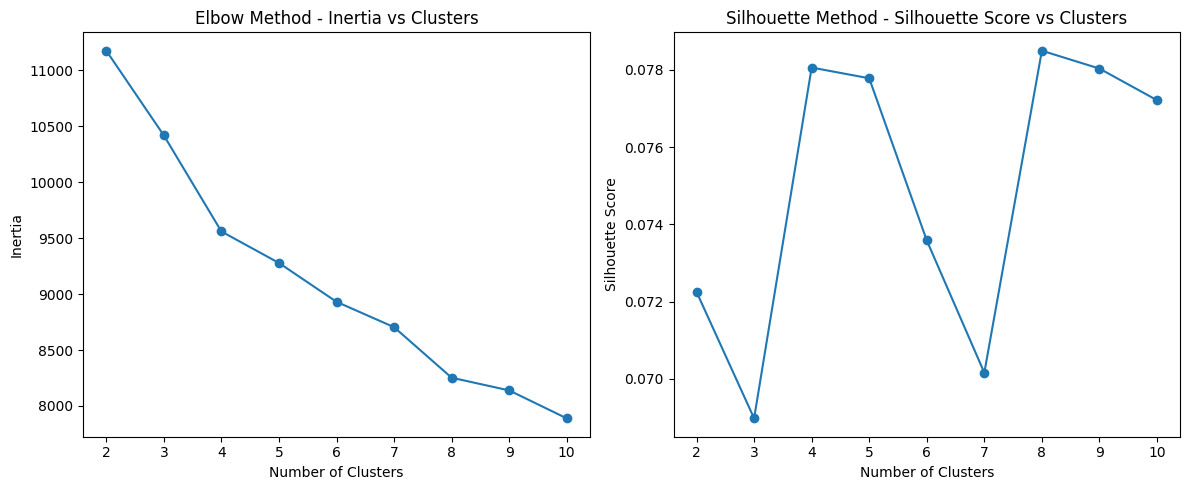

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(cluster_range, inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs Clusters')

plt.subplot(1,2,2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method - Silhouette Score vs Clusters')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the silhouette score
final_silhouette = silhouette_score(scaled_features, clusters)
final_silhouette

np.float64(0.06897576278882624)

### Visualize K-Means clustering using PCA

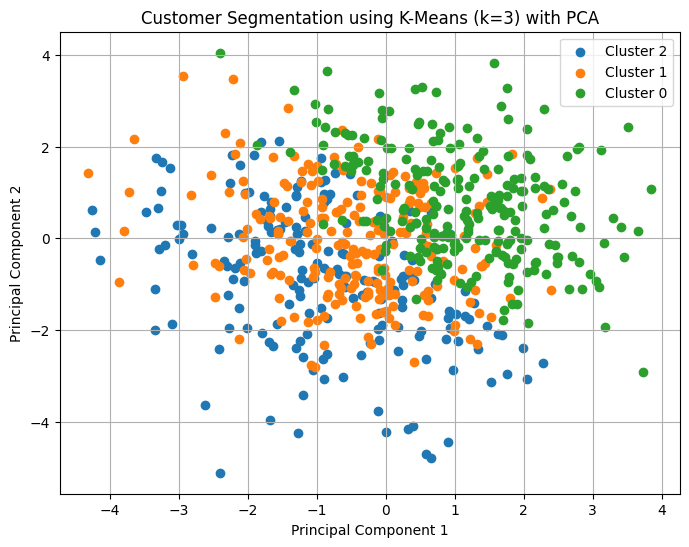

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply KMeans with k=3
kmeans_final = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_final.fit_predict(scaled_data)

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(8, 6))
for cluster in pca_df['Cluster'].unique():
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PC1'],
        pca_df[pca_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}'
    )

plt.title('Customer Segmentation using K-Means (k=3) with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Interpretation of Each Cluster

📍Cluster 0 (Budget-Conscious / Low usage customers)

*   Likely characterized by **lower total minutes and charges** (day, night, international)
*   Might not use additional plans like **International or voice mail**
*   Fewer interactions with customer service
*   Possibly more stable or low-cost customers

📍Cluster 1 ( High interaction / Potentially dissatisfied customers)

*   More frequent **customer service calls**, which could indicate dissatisfaction or complex issues
*   May churn more frequently (check with the original churn label)
*   Watch for high charges or issues with service plans

📍Cluster 2 ( Heavy users / Premium customers)

*   High **day/evening/night/international usage** and corresponding charges
* More likely to have **voice mail and international plans**
*   May contribute significantly to revenue but might also be more demanding













**Potential Strategies**


*   Maintain **Cluster 0** efficiently with minimal cost services
*   Target **Cluster 1** with better customer support
*   Target **Cluster 2** with premium plans or loyalty rewards




